# Linear Advection Equation
This equation describes the passive advection of some scalar field $u(x,t)$ carried along by a flow of constant speed $a$. Which in one dimension takes the form
$$
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
$$
For constant advection speed a, Using the Method of Characteristics (MOC) can provide analytical solution. Characteristics are straight parallel lines and the solution to the Advection equation is a uniform translation of the initial profile
$$ u(x, t) = F(x-  a t)$$
Where $$F(x) = u(x, 0)$$
## Numerical Solution
Most popular methods for solution of advection equation are 1. Finite Difference 2. Finite Volume 3. Discontinuous Galerkin 4. Residual Distribution Methods.
We will use Finite difference as it will allow us to quickly develop codes for the solution and learn some important concepts. 
In simple finite difference method, the domain is divided set of equispaced points called grid points, $x_i$. We assume the solution value $u_i$ corresponding to each grid points. At each grid points, rhs term of advection equation can be replaced with difference between neighboring points, using the classical defination of derivative of a function. We use subscript $i$ for spatial grid location. The subscript $n$ is used for the time level. 
  

!["Picture showing the finite difference mesh" ](pic1.png "Title") 
For LHS, we can simply  use difference between  past value of solution $(n-1)$ and present value of solution $n$ or we can use difference between future value of solution $(n+1)$ and future value $n$ of solution 


Using this we can approximate the advection equation using different finite differnce schemes.
1. First one is forward derivative in time and in space we use central differnce (FTCS)
$$\frac{u_i^{n+1} - u_i^{n} }{\Delta t} +a \cdot \frac{u_{i+1}^{n} - u_{i-1}^{n} }{2*h} = 0$$  

By rearraging the terms we write solutions at Future time ($u_{n+1}$) in some linear combination of solutins of present time $u_{n}$:
$$u_i^{n+1} = u_i^{n}  + a\frac{ \Delta t}{2* h} ( u_{i+1}^{n} - u_{i-1}^{n} ) $$  
In the above expression term $a\frac{ \Delta t}{\Delta h}$ is called  Courant–Friedrichs–Lewy condition, CFL in short. Which we will use extensively in CFD simulations.  CFL condition expresses that the distance that any information travels during the time step length within the mesh must be lower than the distance between mesh elements. In other words, information from a given cell or mesh element must propagate only to its immediate neighbor.
For successful CFD simulations CFL < 1.  IF CFL < 1, then $\Delta t < a* \Delta x$ , time taken by advection field $u$ to cover the distance of $\Delta  h$ will be smaller than $\Delta t$,

## FTFC implementation
Given 1D domain of length L bounded between left boundary $x_l$ and right boundary $x_r$ and a wave with speed $C=0.5$ is travelling in the +ve direction. Lets solve for $Nx=$ grid points and time step $\delta$ 
Lets divide domain in Nx, number of grid points, distance between grid points is 
$$dx = \frac{xr -xl}{N-1}$$
Lets 




'[alt' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':12})

#===============================================================
# Some definitions
#===============================================================

scheme = 2                        # Chose your scheme: 1 (upwind), 2 (centered/Lax-Wendroff)
Nx = 101;                         # Number of grid points
xmax = 2.;                        # Domain limit to the right
xmin = -2.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
dt = 0.04                         # Time step
c = 0.5                           # Advection speed
CFL = c*dt/dx                     # CFL number
x = np.arange(xmin,xmax,dx)       # Discretized mesh
U = np.exp( -0.5 * (x/0.4)**2 )   # Initial solution
Uex = U                           # Exact solution
t_end = 5.                        # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector




#===============================================================
# Temporal loop
#===============================================================
for n in range (1,len(t)):
  
  # Solve equation using upwind scheme
  if (scheme == 1):
    
      Un = U
      if (c>0.):
          Um = np.roll(Un,1)
          U = Un - CFL*(Un-Um)
      else:
          Up = np.roll(Un,-1)
          U = Un - CFL*(Up-Un)
          
  # Solve equation using the centered scheme with/without dissipation
  if (scheme == 2):
  
      theta = (c*dt/dx)**2;
      theta = 0;
      Un = U
      Um = np.roll(Un,1)
      Up = np.roll(Un,-1)
      U  = Un - 0.5*CFL*(Up-Um) + 0.5*theta*(Up-2*Un+Um)
      
  #===============================================================
  # Compute exact solution
  #===============================================================
  d = c*n*dt
  Uex = np.exp(-0.5*(np.mod(x-d+xmax,4)-xmax)**2/0.4**2)
  errL1 = U - Uex
  errL2 = np.linalg.norm(errL1)
  
  #===============================================================
  # Plot solution
  #===============================================================
  if (n==1): fig, ax = plt.subplots(figsize=(5.5,4))
  plt.clf()
  plt.plot(x,U)
  plt.scatter(x,Uex, marker='o', facecolors='white', color='k')
  plt.gca().legend(('Centered scheme ($\\theta$='+str(round(theta,3))+', CFL='+str(CFL)+')','Exact solution'))
  plt.axis([xmin, xmax, 0, 1.4])
  plt.title('t='+str(round(dt*n,3)),fontsize=16)
  plt.xlabel('x',fontsize=18)
  plt.ylabel('u',fontsize=18)
  plt.subplots_adjust(left=0.2)
  plt.subplots_adjust(bottom=0.18)
  plt.draw()
  plt.pause(0.001)

plt.show()
#fig.savefig("figure.pdf", dpi=300)
print ('Error L2 = ',errL2)


In [ ]:


import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Some definitions
#===============================================================


#===============================================================
# Solve equation using the upwind scheme
#===============================================================
dat = 
def FTFS(c, xl, xr, T, dt, Nx):
    dx = (xr-xl)/(Nx-1)           # Mesh size
    x = np.linspace(xr, xl, Nx)     # Discretized mesh
    Nt = int(T/dt)                # Number of iterations
    t = np.linspace(0.,T,Nt+1)    # Time vector
    CFL = c*dt/dx                     # CFL number
    U = np.zeros((Nt+1,Nx))           # u^n_i
    U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
    Uex = U[0,:]                      # Exact solution

    for n in range (0,Nt):

      if (c>0.):
          for i in range (1,Nx):
              U[n+1,i] = U[n,i] - CFL*(U[n,i]-U[n,i-1]);
          U[n+1,0] = U[n+1,Nx-1];
      else:
          print("here ")
          for i in range (0,Nx-1):
              U[n+1,i] = U[n,i] - CFL*(U[n,i+1]-U[n,i]);
          U[n+1,Nx-1] = U[n,0];

    #===============================================================
    # Compute exact solution
    #===============================================================
      d = c*(n+1)*dt
      Uex = np.exp(-0.5*(np.mod(x-d+xr,4)-xr)**2/0.4**2)
      errL1 = U - Uex
      errL2 = np.linalg.norm(errL1)
  


    plt.show()
    
    
#fig.savefig("figure.pdf", dpi=300)
#print 'Error L2 = ',errL2


In [ ]:
def FTFS(c, xl, xr, T, dt, Nx, U, itr):
    dx = (xr-xl)/(Nx-1)           # Mesh size
    x = np.linspace(xl, xr, Nx)     # Discretized mesh
    CFL = c*dt/dx                     # CFL number
    #U = [0 for i in range(0, Nx)]          # u^n_i
    if(itr == 0):
        U = np.exp(-0.5*(x/0.4)**2)  # Initial solution
    Uex = U[:]                      # Exact solution
    for i in range (1, Nx):
      U[i] = U[i] - CFL*(U[i]-U[i-1]);
    U[0] = U[Nx-1];
    return U
U = 0;

for itr in range(0, 100):
    U = FTFS(0.5, -2, 2, 1, 0.04, 101, U, itr)
    plt.plot(U)
    plt.show()

In [ ]:
t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
x

In [ ]:
import matplotlib
U = 0;
total_time_steps = 100;
data = np.zeros((101, total_time_steps))
x = np.linspace(-2, 2, 101)  
for itr in range(0, total_time_steps):
    U = FTFS(0.5, -2, 2, 1, 0.04, 101, U, itr)
    data[:,itr] = U;
    #plt.plot(U)
    #plt.show()
Uex = np.exp(-0.5*(x/0.4)**2)  # Initial solution
    
fig, ax = plt.subplots()
ax.axis([-2,2,0,1])
ax.set_title("FTFS")
ax.scatter(x,Uex, marker='o', facecolors='white', color='k')

l, = ax.plot([],[])    
def animate(i):
    l.set_data(x, data[:,i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=total_time_steps)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Input Parameters
#===============================================================

Nx = 101;                       # Number of grid points in 1D domain whose left bounday is Xl and right boundary is Xr
Xr = 2.;                        # Domain limit to the right
Xl = -2.;                       # Domain limit to the left
T = 1;                          # Total Time of evolution
dt = 0.04                       # Time step
C = 3;                          # Speed of Advection


def ForwarTimeCentralSpace(Xl, Xr, Nx, T, dt, C):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = C*dt/dx                     # CFL number
    U = np.zeros((Nt+1,Nx))           # Solution Matrix, nth row  of matrix contains, solution at nth time steps 
    U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
   
    Uex = np.zeros((Nt+1,Nx))         # Matrix for dumping exact solution at each time step
    Uex[0, :] = U[0,:]                # Exact solution at the beginning  

    errL2 =  np.zeros((Nt+1))
    
    for n in range (0,Nt):

      if (C > 0.):
          for i in range (1,Nx):
              U[n+1,i] = U[n,i] - CFL*(U[n,i]-U[n,i-1]);
          U[n+1,0] = U[n+1,Nx-1];
      else:
          for i in range (0,Nx-1):
              U[n+1,i] = U[n,i] - CFL*(U[n,i+1]-U[n,i]);
          U[n+1,Nx-1] = U[n,0];

    #===============================================================
    # Compute exact solution
    #===============================================================
      d = C*(n+1)*dt
      Uex[n+1,:] = np.exp(-0.5*(np.mod(x-d+ Xr, 4)- Xr)**2/0.4**2)
      errL1 = U[n+1, :] - Uex[n+1, :]

      errL2[n+1] = np.linalg.norm(errL1)
    return U, Uex, errL2

def PlotSoution(Xl, Xr, Nx, T, dt, C, U, Uex):
    dx = (Xr-Xl)/(Nx-1)           # Mesh size
    x = np.linspace(Xl, Xr, Nx)
    CFL = C*dt/dx 
    for n in range (0, int(T/dt)):
      if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
      plt.clf()
      plt.plot(x,U[n,:])
      plt.scatter(x,Uex[n, :], marker='o', facecolors='white', color='k')
      plt.gca().legend(('Upwind scheme (CFL='+str(CFL)+')','Exact solution'))
      plt.axis([Xl, Xr, 0, 1.4])
      plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
      plt.xlabel('x',fontsize=18)
      plt.ylabel('u',fontsize=18)
      plt.subplots_adjust(left=0.2)
      plt.subplots_adjust(bottom=0.18)
      plt.draw()
      plt.pause(0.001)

      plt.show()
    #fig.savefig("figure.pdf", dpi=300)
    #print 'Error L2 = ',errL2

[U, Uex, errL2]= ForwarTimeCentralSpace(Xl, Xr, Nx, T, dt, C)
PlotSoution(Xl, Xr, Nx, T, dt, C, U, Uex)

In [ ]:
dx = (Xr-Xl)/(Nx-1)           # Mesh size
x = np.linspace(Xl, Xr, Nx) 
Nt = int(T /dt)
for n in range (0,Nt, 1):
    plt.plot(x, U[n,:]);
    plt.scatter(x, Uex[n, :])
    plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.axis([-2,2,0,1])
ax.set_title("FTFS")

l, = ax.plot([],[], color='r') 
l2, = ax.plot([], [])   
def animate(i):
    l.set_data(x, U[i,:])
    l2.set_data(x, Uex[i,:] )

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=Nt)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':12})

#===============================================================
# Some definitions
#===============================================================

scheme = 2                        # Chose your scheme: 1 (upwind), 2 (centered/Lax-Wendroff)
Nx = 101;                         # Number of grid points
xmax = 2.;                        # Domain limit to the right
xmin = -2.;                       # Domain limit to the left
dx = (xmax-xmin)/(Nx-1)           # Mesh size
dt = 0.04                         # Time step
c = 0.8                           # Advection speed
CFL = c*dt/dx                     # CFL number
x = np.arange(xmin,xmax,dx)       # Discretized mesh
U = np.exp( -0.5 * (x/0.4)**2 )   # Initial solution
Uex = U                           # Exact solution
t_end = 5.                        # Final time
Nt = int(t_end/dt)                # Number of iterations
t = np.linspace(0.,t_end,Nt+1)    # Time vector


#===============================================================
# Temporal loop
#===============================================================
for n in range (1,len(t)):
  
  # Solve equation using upwind scheme
  if (scheme == 1):
    
      Un = U
      if (c>0.):
          Um = np.roll(Un,1)
          U = Un - CFL*(Un-Um)
      else:
          Up = np.roll(Un,-1)
          U = Un - CFL*(Up-Un)
          
  # Solve equation using the centered scheme with/without dissipation
  if (scheme == 2):
  
      theta = (c*dt/dx)**2;
      Un = U
      Um = np.roll(Un,1)
      Up = np.roll(Un,-1)
      U  = Un - 0.5*CFL*(Up-Um) + 0.5*theta*(Up-2*Un+Um)
      
  #===============================================================
  # Compute exact solution
  #===============================================================
  d = c*n*dt
  Uex = np.exp(-0.5*(np.mod(x-d+xmax,4)-xmax)**2/0.4**2)
  errL1 = U - Uex
  errL2 = np.linalg.norm(errL1)
  
  #===============================================================
  # Plot solution
  #===============================================================
  if (n==1): fig, ax = plt.subplots(figsize=(5.5,4))
  plt.clf()
  plt.plot(x,U)
  plt.scatter(x,Uex, marker='o', facecolors='white', color='k')
  plt.gca().legend(('Centered scheme ($\\theta$='+str(round(theta,3))+', CFL='+str(CFL)+')','Exact solution'))
  plt.axis([xmin, xmax, 0, 1.4])
  plt.title('t='+str(round(dt*n,3)),fontsize=16)
  plt.xlabel('x',fontsize=18)
  plt.ylabel('u',fontsize=18)
  plt.subplots_adjust(left=0.2)
  plt.subplots_adjust(bottom=0.18)
  plt.draw()
  plt.pause(0.001)

plt.show()
#fig.savefig("figure.pdf", dpi=300)
print ('Error L2 = ',errL2)

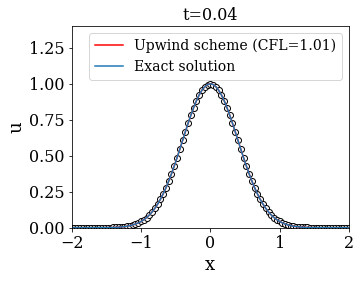

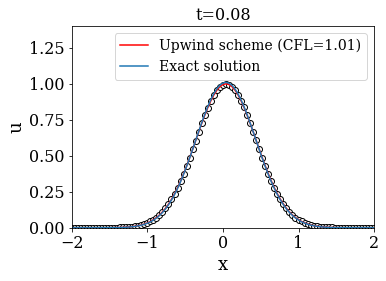

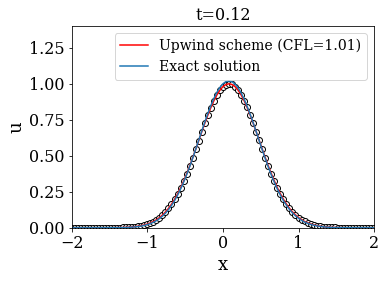

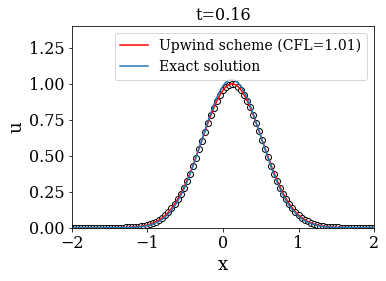

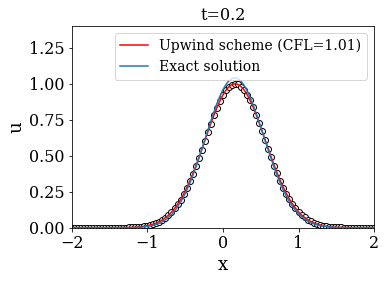

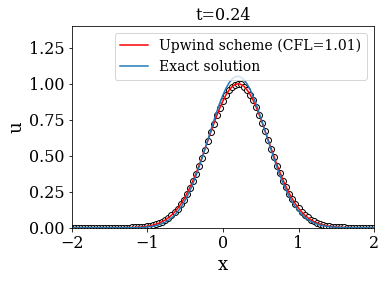

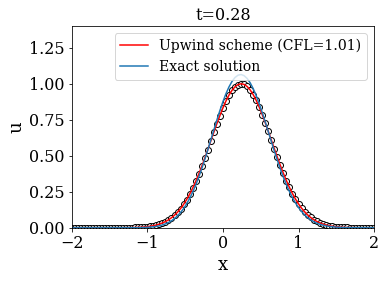

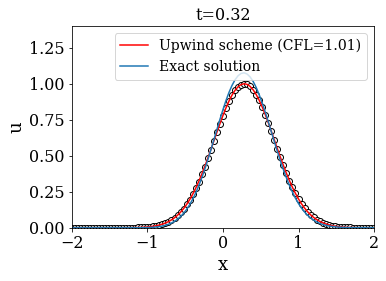

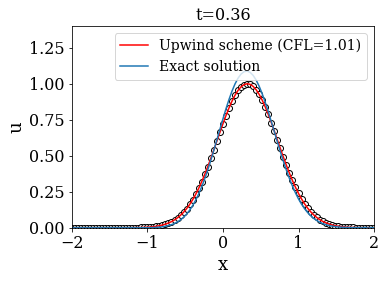

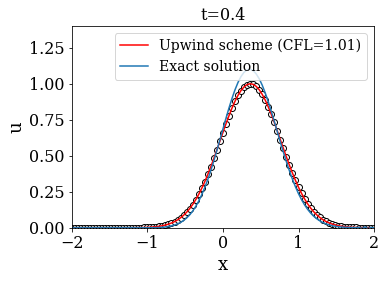

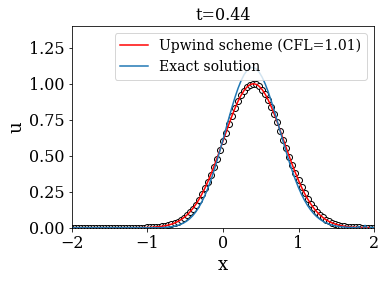

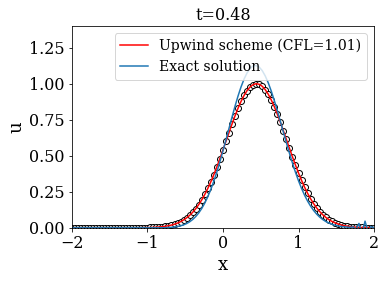

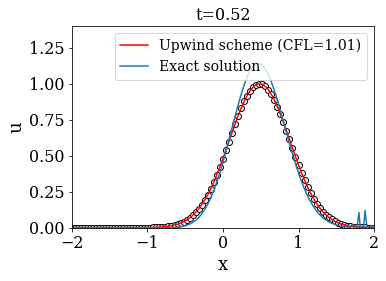

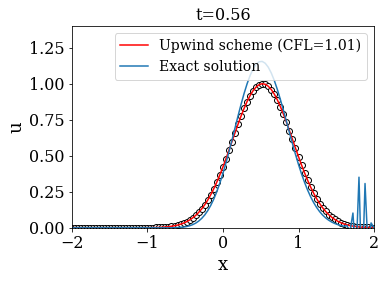

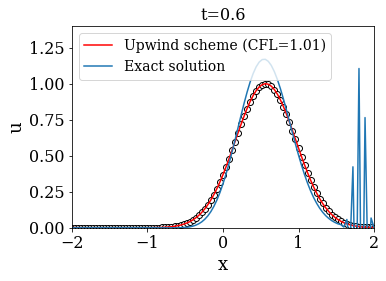

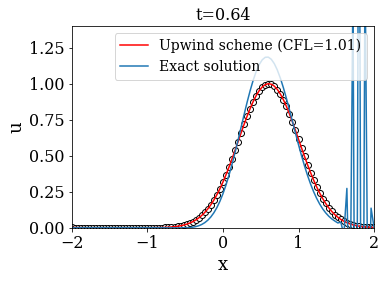

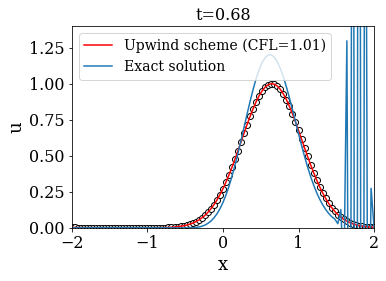

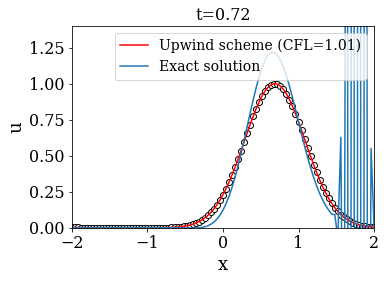

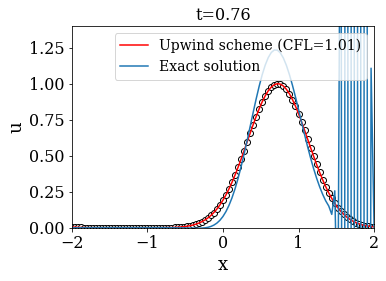

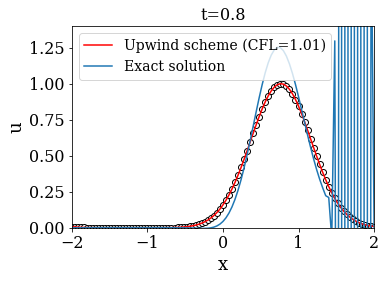

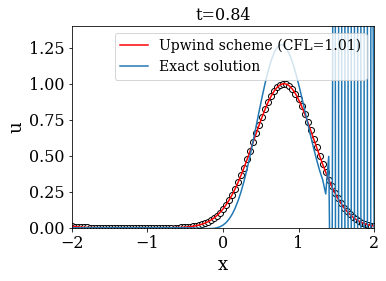

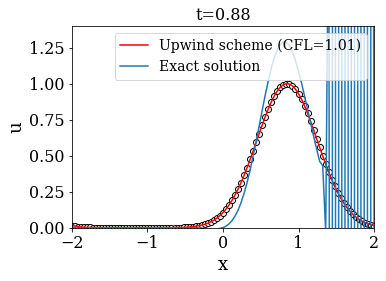

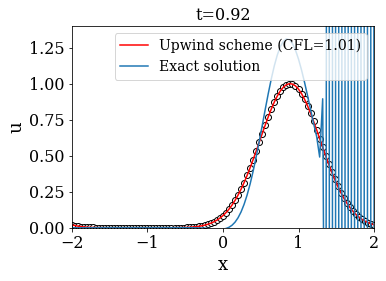

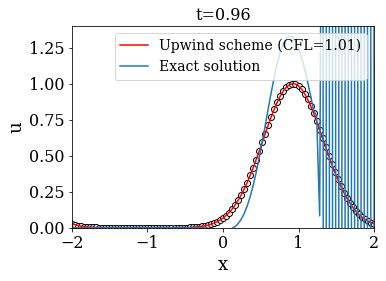

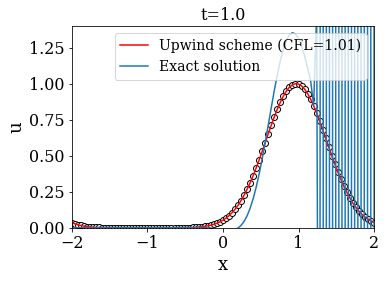

In [22]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rc
rc('font', family='serif')
rc('lines', linewidth=1.5)
rc('font', size=16)
plt.rc('legend',**{'fontsize':14})

#===============================================================
# Input Parameters
#===============================================================

Nx = 101;                       # Number of grid points in 1D domain whose left bounday is Xl and right boundary is Xr
Xr = 2.;                        # Domain limit to the right
Xl = -2.;                       # Domain limit to the left
T = 1;                          # Total Time of evolution
dt = 0.04                       # Time step
C = 1.01;                          # Speed of Advection


def ForwarTimeForwardSpace(Xl, Xr, Nx, T, dt, C):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = C*dt/dx                     # CFL number
    U = np.zeros((Nt+1,Nx))           # Solution Matrix, nth row  of matrix contains, solution at nth time steps 
    U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
   
    Uex = np.zeros((Nt+1,Nx))         # Matrix for dumping exact solution at each time step
    Uex[0, :] = U[0,:]                # Exact solution at the beginning  

    errL2 =  np.zeros((Nt+1))
    
    for n in range (0,Nt):
        for i in range (0 , Nx-1):
            U[n+1,i] = U[n,i] - CFL*(U[n,i+1]-U[n, i]);
        U[n+1, Nx-1] = U[n+1, 0];
        
        d = C*(n+1)*dt
        Uex[n+1,:] = np.exp(-0.5*(np.mod(x-d+ Xr, 4)- Xr)**2/0.4**2)
        errL1 = U[n+1, :] - Uex[n+1, :]
        errL2[n+1] = np.linalg.norm(errL1)
    return U, Uex, errL2


 


def ForwarTimeBackwardSpace(Xl, Xr, Nx, T, dt, C):
    dx = (Xr-Xl)/(Nx-1)           # Size of single element of mesh
    x = np.linspace(Xl, Xr, Nx)    # 1D Mesh grid  
    Nt = int(T/dt)                 # time steps vector
    t = np.linspace(0.,T,Nt+1)

    CFL = C*dt/dx                     # CFL number
    U = np.zeros((Nt+1,Nx))           # Solution Matrix, nth row  of matrix contains, solution at nth time steps 
    U[0,:] = np.exp(-0.5*(x/0.4)**2)  # Initial solution
   
    Uex = np.zeros((Nt+1,Nx))         # Matrix for dumping exact solution at each time step
    Uex[0, :] = U[0,:]                # Exact solution at the beginning  

    errL2 =  np.zeros((Nt+1))
    

    for n in range (0,Nt):
        for i in range (1 , Nx):
            U[n+1,i] = U[n,i] - CFL*(U[n, i]-U[n, i-1]);
        U[n+1, 0] = U[n+1, Nx-1];
        d = C*(n+1)*dt
        Uex[n+1,:] = np.exp(-0.5*(np.mod(x-d+ Xr, 4)- Xr)**2/0.4**2)
        errL1 = U[n+1, :] - Uex[n+1, :]
        errL2[n+1] = np.linalg.norm(errL1)
    return U, Uex, errL2


    #fig.savefig("figure.pdf", dpi=300)
    #print 'Error L2 = ',errL2

[Ub, Uexb, errL2b]= ForwarTimeBackwardSpace(Xl, Xr, Nx, T, dt, C)
[U, Uex, errL2]= ForwarTimeForwardSpace(Xl, Xr, Nx, T, dt, C)

dx = (Xr-Xl)/(Nx-1)           # Mesh size
x = np.linspace(Xl, Xr, Nx)
CFL = C*dt/dx 
for n in range (0, int(T/dt)):
    if (n==0): fig, ax = plt.subplots(figsize=(5.5,4))
    plt.clf()
    plt.plot(x,Ub[n,:], color='r')
    plt.plot(x,U[n,:])
    plt.scatter(x,Uex[n, :], marker='o', facecolors='white', color='k')
    plt.gca().legend(('Upwind scheme (CFL='+str(CFL)+')','Exact solution'))
    plt.axis([Xl, Xr, 0, 1.4])
    plt.title('t='+str(round(dt*(n+1),3)),fontsize=16)
    plt.xlabel('x',fontsize=18)
    plt.ylabel('u',fontsize=18)
    plt.subplots_adjust(left=0.2)
    plt.subplots_adjust(bottom=0.18)
    plt.draw()
    plt.pause(0.001)

    plt.show()


In [18]:
Nx

101

In [ ]:
2. This one is forward derivative in time and in space we use backward difference (FTBS)
$$\frac{u_i^{n+1} - u_i^{n} }{\Delta t} +a \cdot \frac{u_{i+1}^{n} - u_{i}^{n} }{h} = 0$$  

3. In this forward derivative in time and in space (FTFS)
$$\frac{u_i^{n+1} - u_i^{n} }{\Delta t} +a \cdot \frac{u_i^{n} - u_{i-1}^{n} }{h} = 0$$  



